# End-to-End Machine Learning Project (house-prices-advanced-regression)


We are going to use house-prices-advanced-regression-techniques

To Download :https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Dataset contain two csv file one for train and one for test

# Objective

the main objective of this project is to predict the prices of houses

# import the required libraries

We will use some of python libraries to help us to deal with data like

numpy : efficient storage and manipulation of numerical arrays

pandas :offers data structures and operations for manipulating numerical tables and time series

matplotlib : for data visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting The Data

we will use read_csv from pandas to read the train&test files

In [3]:
train=pd.read_csv("E:\\train.csv")
test=pd.read_csv("E:\\test.csv")
print(train.shape)


(1460, 81)


# Quick Look at the Data Structure

In [4]:
train.head(5)
print(train.shape)
print(train["SalePrice"].max(),train["SalePrice"].min())
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
#sns.pairplot(train[col], size=5, kind='reg')

(1460, 81)
755000 34900


In [5]:
#train.info(5)

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Saleprice


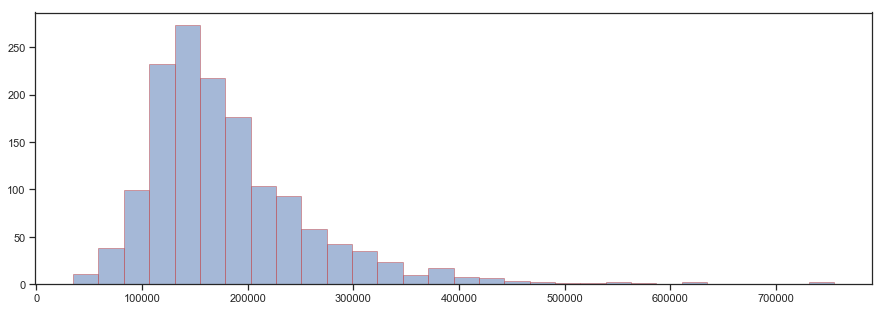

In [7]:
#train["SalePrice"].value_counts()
fig=plt.figure(figsize=(15,5))
plt.hist(train["SalePrice"],edgecolor='r',alpha=0.5,bins=30)
print("Saleprice")

In [8]:
#train.hist(bins=50, figsize=(20,15))
#print("train")

# Showing the Null values in the dataset

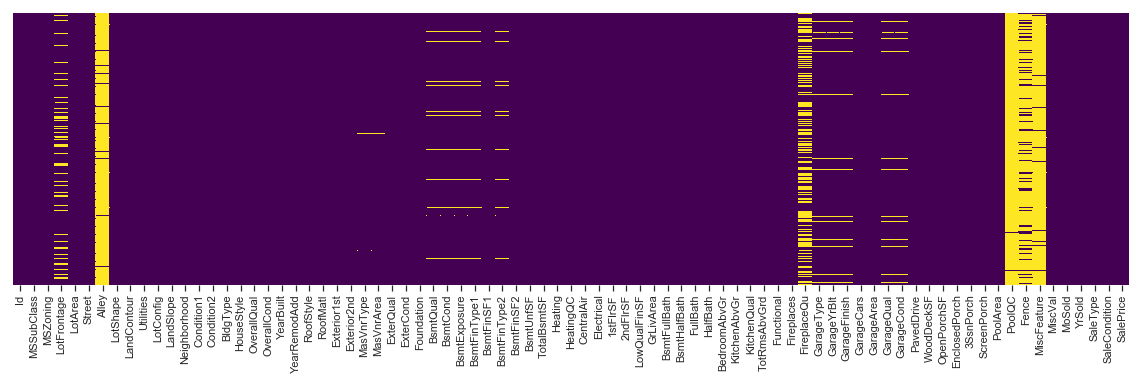

In [9]:
fig=plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis',xticklabels=True)

# Get number of nulls 

now we find the percentage of null values in train set

In [471]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:20]/train.shape[0]*100)
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

              Null Count
Feature                 
PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
GarageCond      5.547945
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
Utilities       0.000000


we have some columns with a lot of null values

PoolQC         (99.587629)

MiscFeature    (96.357388)

Alley          (93.745704)

Fence          (80.687285)

so we will drop those columns

In [496]:
d=train
train.dropna(axis=1,inplace=True,thresh=1000,how="any")
test.dropna(axis=1,inplace=True,thresh=1000,how="any")
print(train.shape)

(1460, 78)


In [497]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:14])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

              Null Count
Feature                 
GarageType            81
GarageCond            81
GarageFinish          81
GarageQual            81
BsmtFinType2          38
BsmtExposure          38
BsmtQual              37
BsmtCond              37
BsmtFinType1          37
MasVnrType             8
Electrical             1
YearRemodAdd           0
BsmtFinSF1             0
RoofStyle              0


# Replace null values in numeric columns with median

In [498]:
train.fillna(train.select_dtypes(include=[np.number]).median(),inplace=True)
test.fillna(test.select_dtypes(include=[np.number]).median(),inplace=True)

In [499]:
for i in train.columns:
    if train[i].dtype=="object" and train[i].isnull().sum()>0:
        print(i)
     

MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
GarageType
GarageFinish
GarageQual
GarageCond


as we find that some of columns that contain null values is text columns 

so first we will convert them to numerical values

# Handling Text and Categorical Attributes


not all attributes have numerical value some of them are labels 

In [505]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
data1 = test.select_dtypes(include=[np.number]).interpolate().dropna()
X = data.drop(['SalePrice', 'Id'], axis=1)
X1=data1.drop([ 'Id'], axis=1)

# Training and Evaluating on the Training Set


# Better Evaluation Using Cross-Validation
One way to evaluate the Decision Tree model would be to use the train_test_split

function to split the training set into a smaller training set and a validation set, then

train your models against the smaller training set and evaluate them against the validation set.

It’s a bit of work, but nothing too difficult and it would work fairly well.

In [506]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

# Training The Model using LinearRegression

In [507]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Model performance

In [528]:
print( model.score(X_test, y_test))
predictions = model.predict(X_test)
pre=pd.DataFrame(model.predict(X_test))
#print( mean_squared_error(y_test, predictions))
print( mean_squared_error(y_test, predictions))


0.864746341057823
0.023051468191912818


# Training The Model using DecisionTreeRegressor

In [514]:
from sklearn.tree import 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
housing_predictions = tree_reg.predict(X_test)

# Model performance

In [515]:
tree_mse = mean_squared_error(y_test, housing_predictions)
print(tree_reg.score(X_test,y_test))
tree_rmse = np.sqrt(tree_mse)

0.7545714507154955


As we see LinearRegression model have more accuracy than DecisionTreeRegressor

In [536]:
from sklearn.pipeline import Pipeline # LinearRegression pipeline

In [537]:
pipeline = Pipeline([('regr',LinearRegression())])
parameters = {
}

In [538]:
grid =  GridSearchCV(pipeline,parameters,scoring='r2',cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)
print( grid.score(X_test, y_test))


0.7788646381332156
0.864746341057823
